In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE


In [4]:
# Load the dataset
file_path = '../data/train_data.csv'  
train_data = pd.read_csv(file_path)

# Preview the data
print("First 5 rows:")
print(train_data.head())
print("\nDataset Info:")
print(train_data.info())
print("\nMissing Values:")
print(train_data.isnull().sum())

First 5 rows:
      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity 

In [6]:
# Drop columns that are redundant or irrelevant
columns_to_drop = ['id', 'wpt_name', 'subvillage', 'region_code', 'scheme_name', 'recorded_by']
train_data.drop(columns=columns_to_drop, inplace=True)


In [7]:
# Fill missing values for categorical and numerical columns
train_data['funder'].fillna('Unknown', inplace=True)
train_data['installer'].fillna('Unknown', inplace=True)
train_data['public_meeting'].fillna(False, inplace=True)
train_data['permit'].fillna(False, inplace=True)
train_data['scheme_management'].fillna('Unknown', inplace=True)

# Verify no missing values
print("\nRemaining Missing Values:")
print(train_data.isnull().sum())



Remaining Missing Values:
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64


In [8]:
# Create a new feature: Age of the well
train_data['well_age'] = 2023 - train_data['construction_year']
train_data['well_age'] = train_data['well_age'].replace({2023: 0})  # Replace invalid years


## EDA

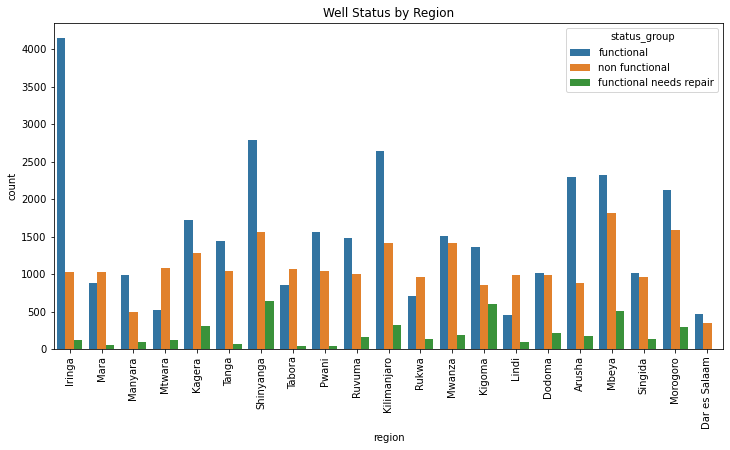

In [25]:
#Well status by region
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='region', hue='status_group')
plt.xticks(rotation=90)
plt.title("Well Status by Region")
plt.show()

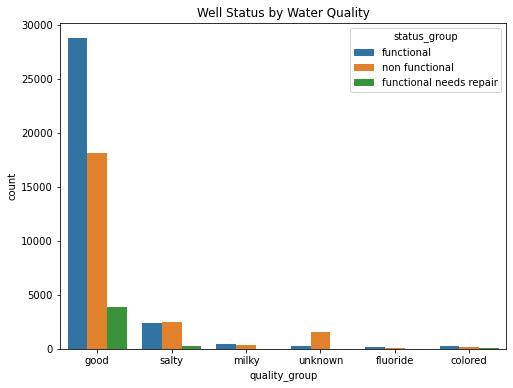

In [16]:
# water quality and well status
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='quality_group', hue='status_group')
plt.title("Well Status by Water Quality")
#plt.xlabel()
plt.show()

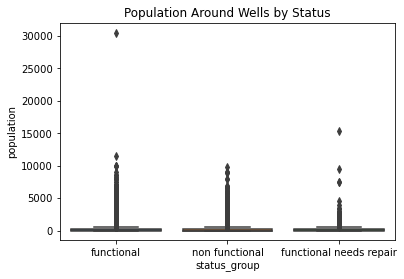

In [12]:
# well status by population
sns.boxplot(data=train_data, x='status_group', y='population')
plt.title("Population Around Wells by Status")
plt.show()

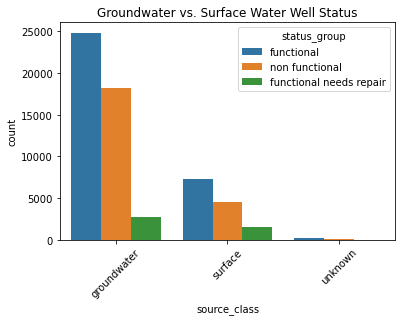

In [21]:
#Ground Vs Surface water
sns.countplot(data=train_data, x='source_class', hue='status_group')
plt.xticks(rotation=45)
plt.title("Groundwater vs. Surface Water Well Status")
plt.show()


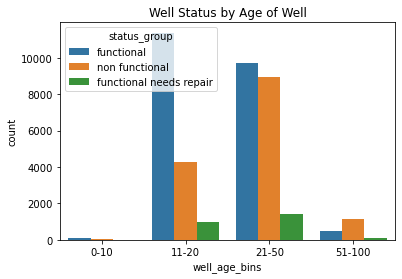

In [14]:
#Well age and failure
train_data['well_age_bins'] = pd.cut(train_data['well_age'], bins=[0, 10, 20, 50, 100], labels=['0-10', '11-20', '21-50', '51-100'])
sns.countplot(data=train_data, x='well_age_bins', hue='status_group')
plt.title("Well Status by Age of Well")
plt.show()
